In [2]:
#!pip install pandas
import pandas as pd
#!pip install --upgrade tensorflow 
import tensorflow as tf
#!pip install random
import random
import numpy as np
import matplotlib as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
train1 = pd.read_csv('drive/My Drive/Colab Notebooks/data-1/training1.csv')
train2 = pd.read_csv('drive/My Drive/Colab Notebooks/data-1/training2.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/data-1/test.csv')

Mounted at /content/drive


In [48]:
# Shuffle the data and the labels from one-another

train1 = train1.sample(frac = 1)
train2 = train2.sample(frac = 1)
#train1_data = train1.iloc[:, 0:train1.shape[1]-2]
#train1_labels_confidence = train1.iloc[:, train1.shape[1]-2:train1.shape[1]]
#train2_data = train2.iloc[:, 0:train2.shape[1]-2]
#train2_labels_confidence = train2.iloc[:, train2.shape[1]-2:train2.shape[1]]

# Replace NaN values with random values (0-1) and normalise
train1.fillna(random.uniform(0, 1), inplace = True)
train2.fillna(random.uniform(0, 1), inplace = True)

# Set the databases to be arrays (so they can be used later)
train1_data = train1.values
train2_data = train2.values

train1_data = tf.keras.utils.normalize(train1_data, axis = 1)
train2_data = tf.keras.utils.normalize(train2_data, axis = 1)

#train2_labels_confidence = train2_labels_confidence.values
#train1_labels_confidence = train1_labels_confidence.values

# Split the datasets into 3 and join them to create 3 new hybrid data sets
train1_data1, train1_data2, train1_data3 = np.array_split(train1_data, 3)
train2_data1, train2_data2, train2_data3 = np.array_split(train2_data, 3)
data1 = np.concatenate((train1_data1, train2_data1), axis = 0)
data2 = np.concatenate((train1_data2, train2_data3), axis = 0)
data3 = np.concatenate((train1_data2, train2_data3), axis = 0)

# Join 2 of the datasets together and have the third as the test set. Repeat for all the permutations.
# The labels and confidences are then split from the data
train_set1 = np.concatenate((data1, data2), axis = 0)
test_set1 = data3

train_set1 = pd.DataFrame(train_set1)
train_set1_data = train_set1.iloc[:, 0:train_set1.shape[1]-2]
train_set1_data = train_set1_data.values
train_set1_labels = train_set1.iloc[:, train_set1.shape[1]-2:]
train_set1_labels = train_set1_labels.values
test_set1 = pd.DataFrame(test_set1)
test_set1_data = test_set1.iloc[:, 0:test_set1.shape[1]-2]
test_set1_data = test_set1_data.values
test_set1_labels = test_set1.iloc[:, test_set1.shape[1]-2:]
test_set1_labels = test_set1_labels.values


train_set2 = np.concatenate((data1, data3), axis = 0)
test_set2 = data2

train_set2 = pd.DataFrame(train_set1)
train_set2_data = train_set2.iloc[:, 0:train_set2.shape[1]-2]
train_set2_data = train_set2_data.values
train_set2_labels = train_set2.iloc[:, train_set2.shape[1]-2:]
train_set2_labels = train_set2_labels.values
test_set2 = pd.DataFrame(test_set2)
test_set2_data = test_set2.iloc[:, 0:test_set2.shape[1]-2]
test_set2_data = test_set2_data.values
test_set2_labels = test_set2.iloc[:, test_set2.shape[1]-2:]
test_set2_labels = test_set2_labels.values


train_set3 = np.concatenate((data2, data3), axis = 0)
test_set3 = data1

train_set3 = pd.DataFrame(train_set1)
train_set3_data = train_set3.iloc[:, 0:train_set3.shape[1]-2]
train_set3_data = train_set3_data.values
train_set3_labels = train_set3.iloc[:, train_set3.shape[1]-2:]
train_set3_labels = train_set3_labels.values
test_set3 = pd.DataFrame(test_set3)
test_set3_data = test_set3.iloc[:, 0:test_set3.shape[1]-2]
test_set3_data = test_set3_data.values
test_set3_labels = test_set3.iloc[:, test_set3.shape[1]-2:]
test_set3_labels = test_set3_labels.values

# Multiply the lable by the confidence. Makes it a regression task
#for y in range(test_set1_labels.shape[1]):
#    test_set1_labels[0, y] = test_set1_labels[0, y] * test_set1_labels[1, y]
#for y in range(test_set2_labels.shape[1]):
#    test_set1_labels[0, y] = test_set1_labels[0, y] * test_set1_labels[1, y]
#for y in range(test_set3_labels.shape[1]):
#    test_set1_labels[0, y] = test_set1_labels[0, y] * test_set1_labels[1, y]

## Shuffle the 2 sections (missing data and not missing data) together
#train_set1_data = pd.DataFrame(train_set1_data)
#train_set1_data.sample(frac = 1)
#train_set1_data.values
#train_set2_data = pd.DataFrame(train_set2_data)
#train_set2_data.sample(frac = 1)
#train_set2_data.values
#train_set3_data = pd.DataFrame(train_set3_data)
#train_set3_data.sample(frac = 1)
#train_set3_data.values
test_data = test.values
all_training_data = train_set1_data + train_set2_data + train_set3_data
all_training_labels = train_set1_labels + train_set2_labels + train_set3_labels

In [5]:
#plt(range(0, train1_data.shape[0]), train1_data)
#plt(range(0, train2_data.shape[0]), train2_data)
#plt(range(0, train3_data.shape[0]), train3_data)

**Creating a NaN mask**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#print(np.argwhere(np.isnan(all_train_data)))

# The mask is used so the NN can learn to ignore values where the mask is 0 (those that used to be NaN values)
def nanMask(data):
    mask = np.ones(data.shape)
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if data[x, y] == "nan":
                mask[x, y] = 0.5
    return mask

In [7]:
#all_train_labels_confidence = np.expand_dims(all_train_labels_confidence, axis = 0)
#all_train_data = np.expand_dims(all_train_data, axis = 0)
#train2_data = np.expand_dims(all_train_data, axis = 0)
#train2_labels_confidence = np.expand_dims(all_train_data, axis = 0)
#np.resize(train2_data, (2, train2_data.shape[1], train2_data.shape[2]))

#print(all_train_data.shape)

**Create the neural network:**

In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

**Run the model**

Training Data Names:                   | Test Data Names:    
---------------------------------------|---------------------------------
train_set1_data, train_set1_labels     | test_set1_data, test_set1_labels      
train_set2_data, train_set2_labels     | test_set2_data, test_set2_labels       
train_set3_data, train_set3_labels     | test_set3_data, test_set3_labels       

In [9]:
print(train_set1_labels.shape, test_set1_labels.shape)

(2267, 2) (1133, 2)


In [10]:
loss, accuracy = model.evaluate(test_set1_data, test_set1_labels)
print(loss, accuracy )

36/36 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5693
0.6931323409080505 0.5692850947380066


In [56]:
trains = 10
accuracy_array_set1 = np.zeros((trains))
loss_array_set1 = np.zeros((trains))
accuracy_array_set2 = np.zeros((trains))
loss_array_set2 = np.zeros((trains))
accuracy_array_set3 = np.zeros((trains))
loss_array_set3 = np.zeros((trains))
accuracies = np.zeros((3, trains))

for index in range(0, trains):
    model.fit(train_set1_data, train_set1_labels, epochs = 5)
    loss, accuracy = model.evaluate(test_set1_data, test_set1_labels)
    accuracy_array_set1[index] = accuracy
    loss_array_set1[index] = loss
print("Set 1 COMPLETE")

#for index in range(0, trains):
#    model.fit(train_set2_data, train_set2_labels, epochs = 5)
#    loss, accuracy = model.evaluate(test_set2_data, test_set2_labels)
#    accuracy_array_set2[index] = accuracy
#    loss_array_set2[index] = loss
#print("Set 2 COMPLETE")
#
#for index in range(0, trains):
#    model.fit(train_set3_data, train_set3_labels, epochs = 5)
#    loss, accuracy = model.evaluate(test_set3_data, test_set3_labels)
#    accuracy_array_set3[index] = accuracy
#    loss_array_set3[index] = loss
#print("Set 3 COMPLETE")


Epoch 1/5
71/71 [==============================] - 46s 645ms/step - loss: 0.6931 - accuracy: 0.5298
Epoch 2/5
71/71 [==============================] - 44s 619ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 3/5
71/71 [==============================] - 44s 617ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 4/5
71/71 [==============================] - 44s 619ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 5/5
36/36 [==============================] - 5s 128ms/step - loss: 0.6931 - accuracy: 0.5322
Epoch 1/5
71/71 [==============================] - 44s 614ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 2/5
71/71 [==============================] - 44s 617ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 3/5
71/71 [==============================] - 43s 612ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 4/5
71/71 [==============================] - 44s 625ms/step - loss: 0.6931 - accuracy: 0.5351
Epoch 5/5
36/36 [==============================] - 5s 126ms/step - loss: 0.6931 - accuracy: 0.5322
Ep

**Displaying Data**

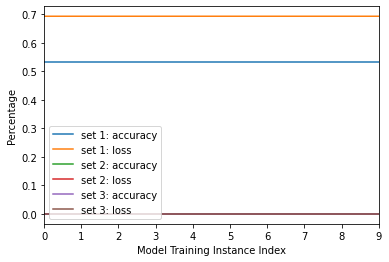

In [57]:
plt.plot(range(0, trains), accuracy_array_set1, label = "set 1: accuracy")
plt.plot(range(0, trains), loss_array_set1, label = "set 1: loss")
plt.plot(range(0, trains), accuracy_array_set2, label = "set 2: accuracy")
plt.plot(range(0, trains), loss_array_set2, label = "set 2: loss")
plt.plot(range(0, trains), accuracy_array_set3, label = "set 3: accuracy")
plt.plot(range(0, trains), loss_array_set3, label = "set 3: loss")
plt.xlim(0, trains-1)
plt.xlabel("Model Training Instance Index")
plt.ylabel("Percentage")
plt.legend(loc = 3)
plt.show()

Text(0, 0.5, 'Percentage')

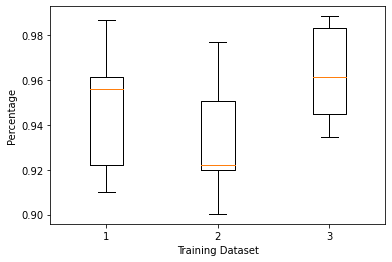

In [28]:
accuracies = (accuracy_array_set1, accuracy_array_set2, accuracy_array_set3)
plt.boxplot(accuracies)
plt.xlabel("Training Dataset")
plt.ylabel("Percentage")


Text(0, 0.5, 'Percentage (x10)')

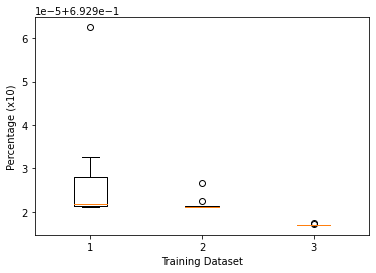

In [29]:
losses = (loss_array_set1, loss_array_set2, loss_array_set3)
plt.boxplot(losses)
plt.xlabel("Training Dataset")
plt.ylabel("Percentage (x10)")
#plt.ylim(0.45, 0.5)

**Retraining with trainingSet1 as this seemed mode reliable**

In [49]:
model.fit(all_training_data, all_training_labels, epochs = 5)
loss, accuracy = model.evaluate(all_training_data, all_training_labels)
print(loss, accuracy)

Epoch 1/5
71/71 [==============================] - 1s 12ms/step - loss: 0.6921 - accuracy: 0.7278
Epoch 2/5
71/71 [==============================] - 1s 10ms/step - loss: 0.6917 - accuracy: 0.8293
Epoch 3/5
71/71 [==============================] - 1s 7ms/step - loss: 0.6915 - accuracy: 0.8963
Epoch 4/5
71/71 [==============================] - 1s 7ms/step - loss: 0.6914 - accuracy: 0.9294
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.9599
0.6912248134613037 0.9598588347434998


**Predict with model**

In [50]:
test.fillna(random.uniform(0, 1), inplace = True)
test = tf.keras.utils.normalize(test, axis = 1)
test_data = test.values
predictions = model.predict([test_data])

In [51]:
for y in range(0, predictions.shape[0]):
    if predictions[y, 0] >= 0.5:
        predictions[y, 0] = 1
    else:
        predictions[y, 0] = 0
pedictions = predictions[:, 0]
print(pedictions)

[0. 0. 1. ... 0. 0. 0.]


**Save the model and predictions**

In [52]:
model.save('drive/My Drive/Colab Notebooks/data-1/')

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/data-1/assets


In [53]:
print(predictions[:, 0])
predictions_df = pd.DataFrame(predictions[:, 0])
predictions_df = predictions_df.astype(int)
predictions_df.columns = ["Prediction"]
predictions_df.to_csv('drive/My Drive/Colab Notebooks/data-1/FML Predictions', index=False)

[0. 0. 1. ... 0. 0. 0.]
